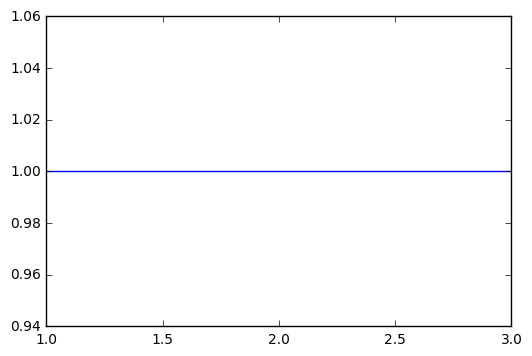

In [1]:
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,1,1]
plt.plot(x,y)
plt.show()